# Analysis: Gender Gap in College Degrees

Learning Objectives:
* Work with matplotlib to enhance presentation of our data analysis
* Use for loops and lists to repeat graphs within subplot
* Export chart images


First, let's import the dataset.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

file = 'percent-bachelors-degrees-women-usa.csv'
women_degrees = pd.read_csv('/Users/nstanzione/Documents/EDU/DataQuest/Data/' + file)

Let's plot some initial charts. First we create colors that will stand out for everyone, even those who have red-green color-blindnesss.  Then we will use these colors in line charts to graph the gender gap in STEM majors.

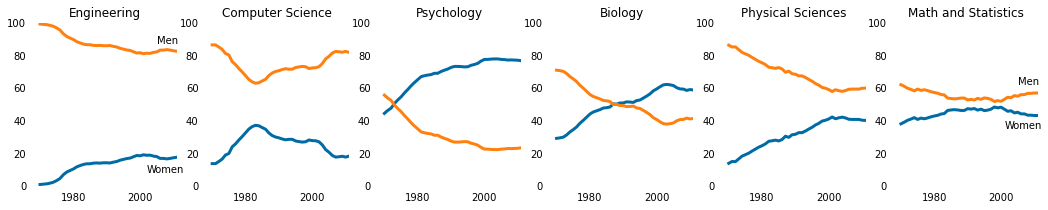

In [39]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Next, let's plot all of the majors broken into three separate categories next to one another, organized by column in one subplot.

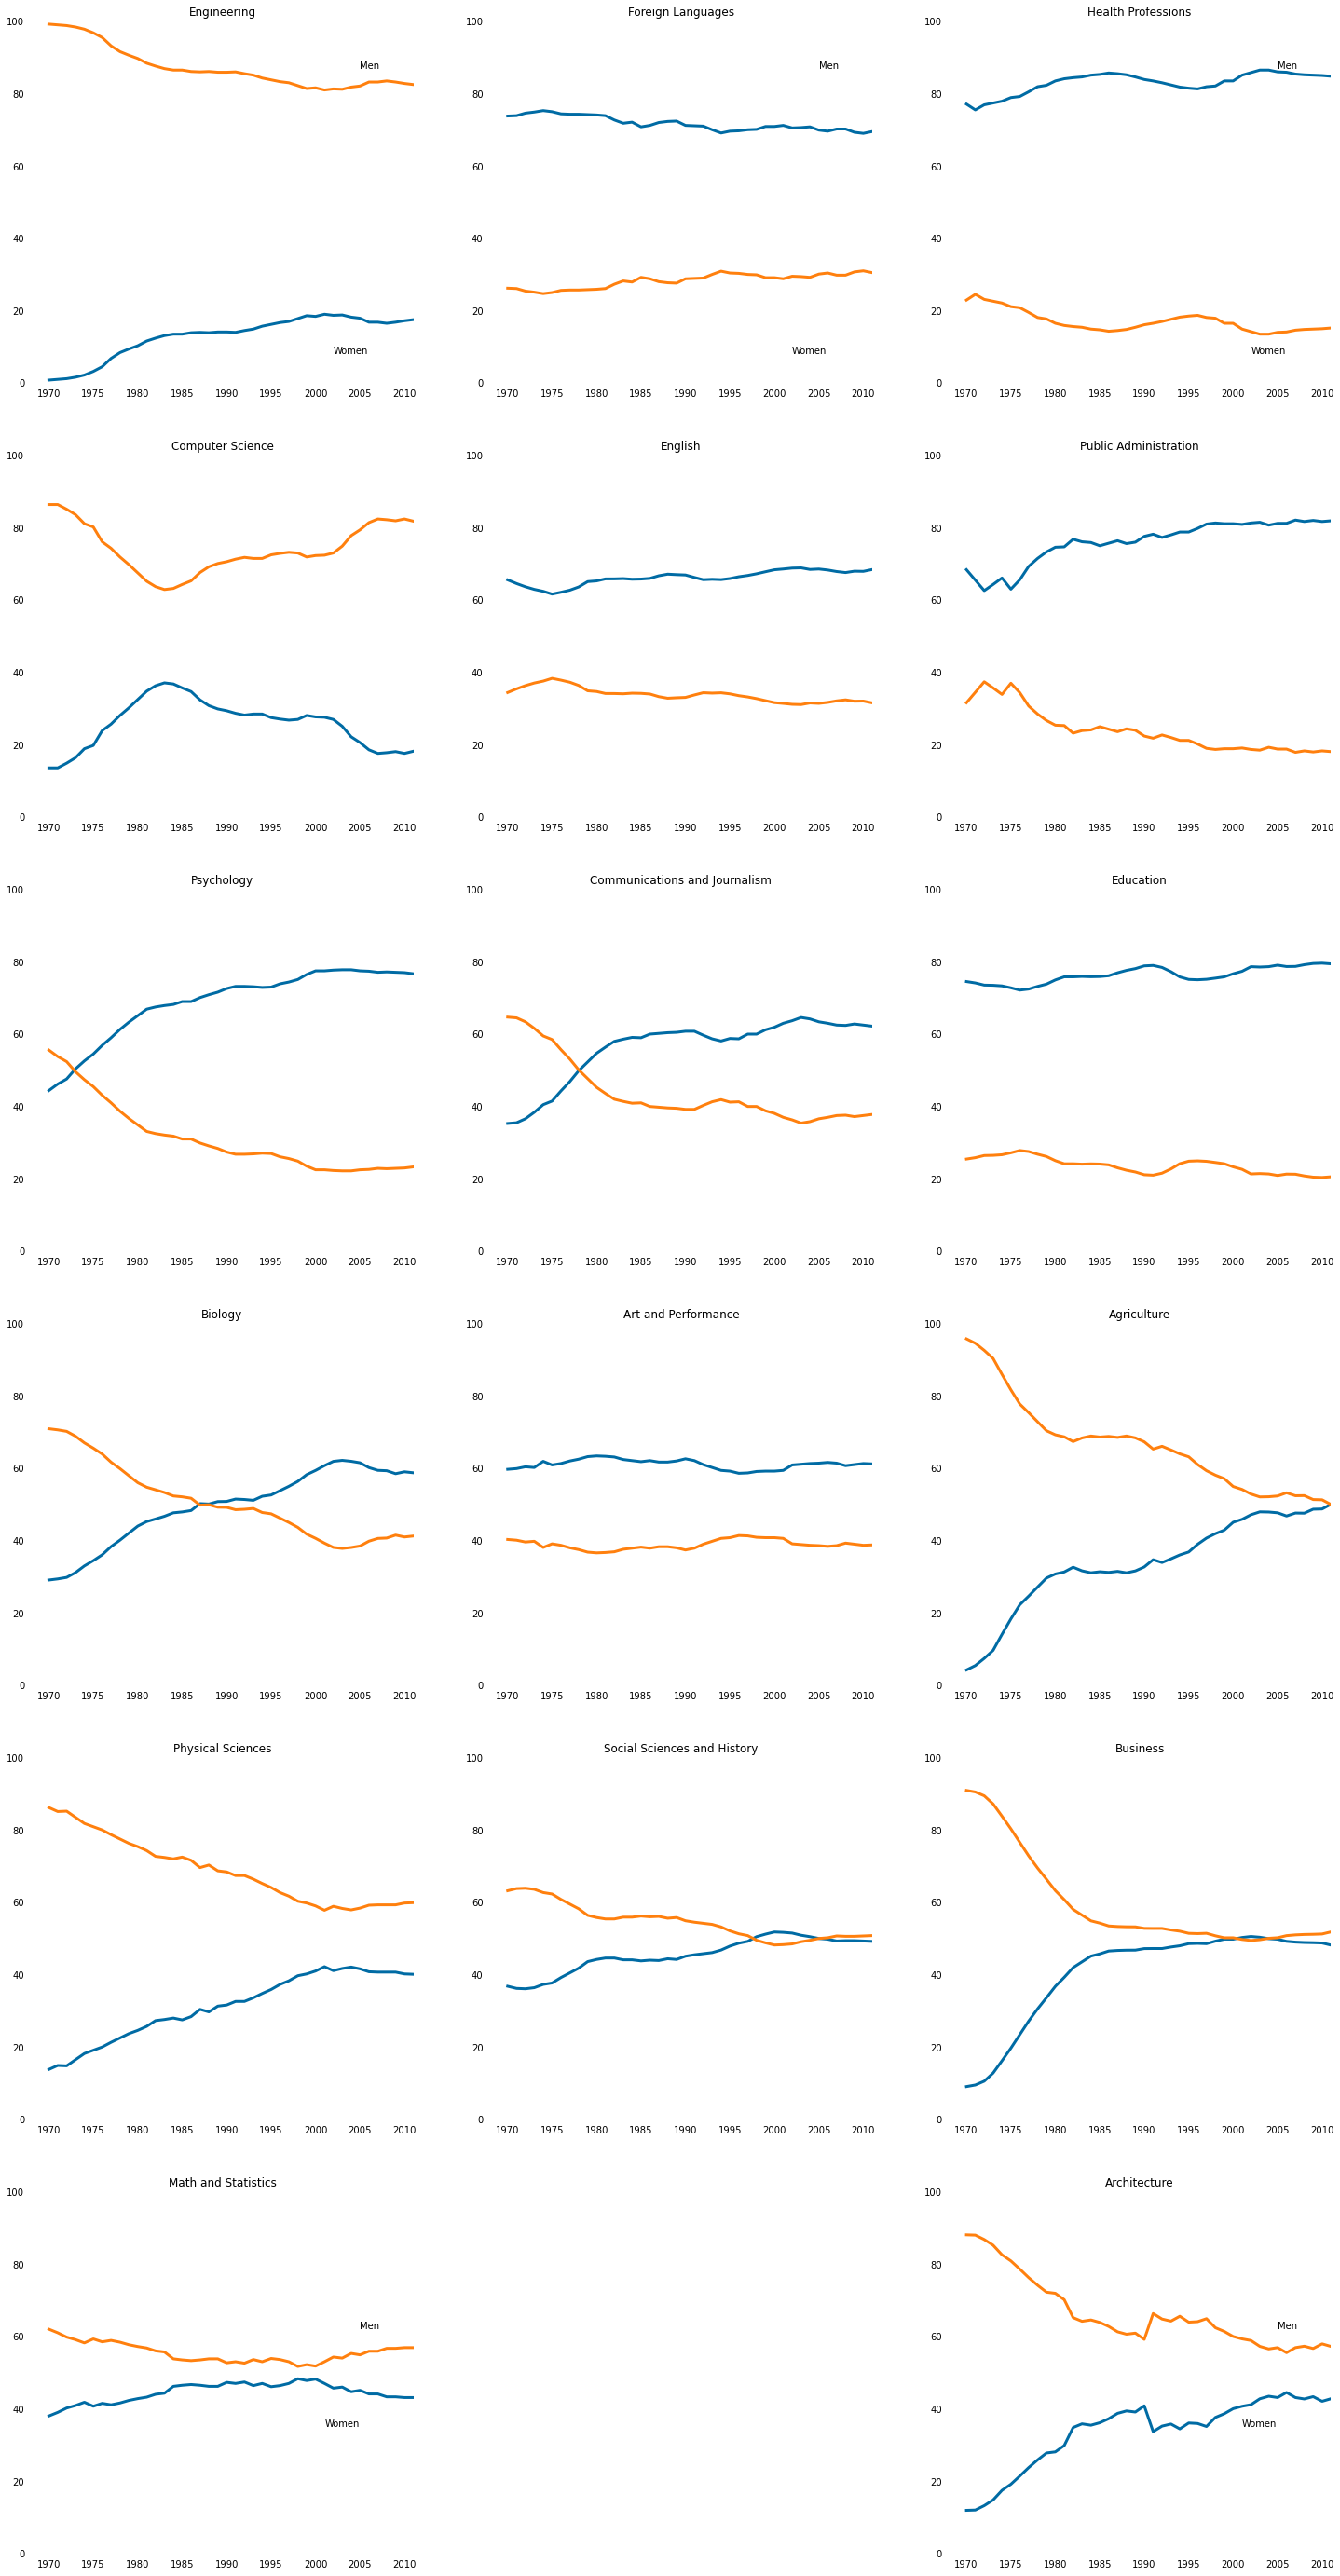

In [40]:
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

categories = [stem_cats, lib_arts_cats, other_cats]

fig = plt.figure(figsize=(25, 50))

for cat in categories:
    for sp in range(0,len(cat)):
        ax = fig.add_subplot(6,3,categories.index(cat)+sp*3+1)
        ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cat[sp])
        ax.tick_params(bottom=False, top=False, left=False, right=False)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == len(cat)-1 and categories.index(cat) != 1:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')

plt.show()


With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one.

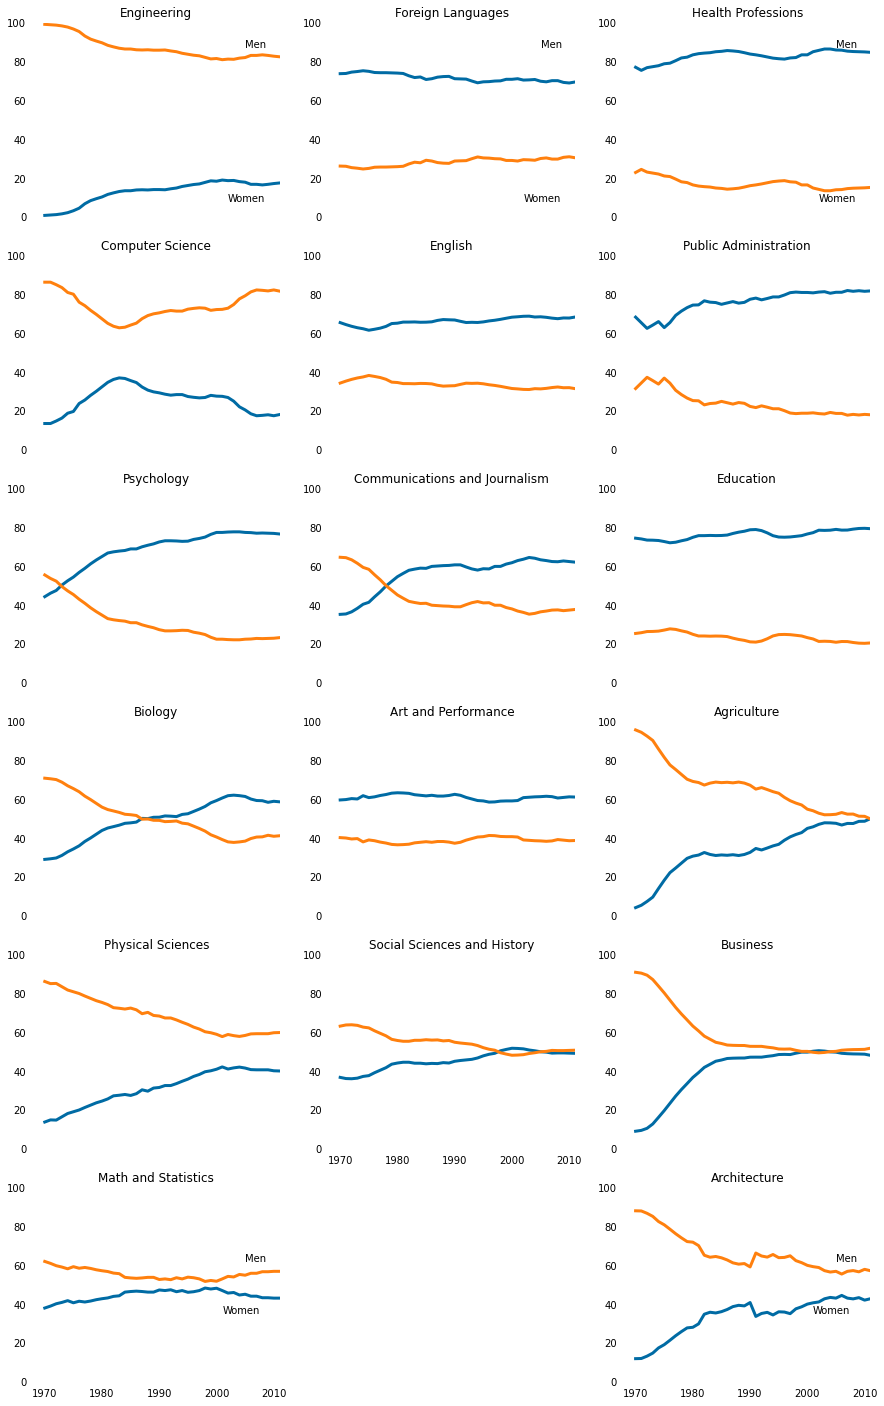

In [41]:
fig = plt.figure(figsize=(15, 25))

for cat in categories:
    for sp in range(0,len(cat)):
        ax = fig.add_subplot(6,3,categories.index(cat)+sp*3+1)
        ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(cat[sp])
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
        
        if sp == len(cat)-1:
            ax.tick_params(labelbottom=True)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == len(cat)-1 and categories.index(cat) != 1:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')

plt.show()

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

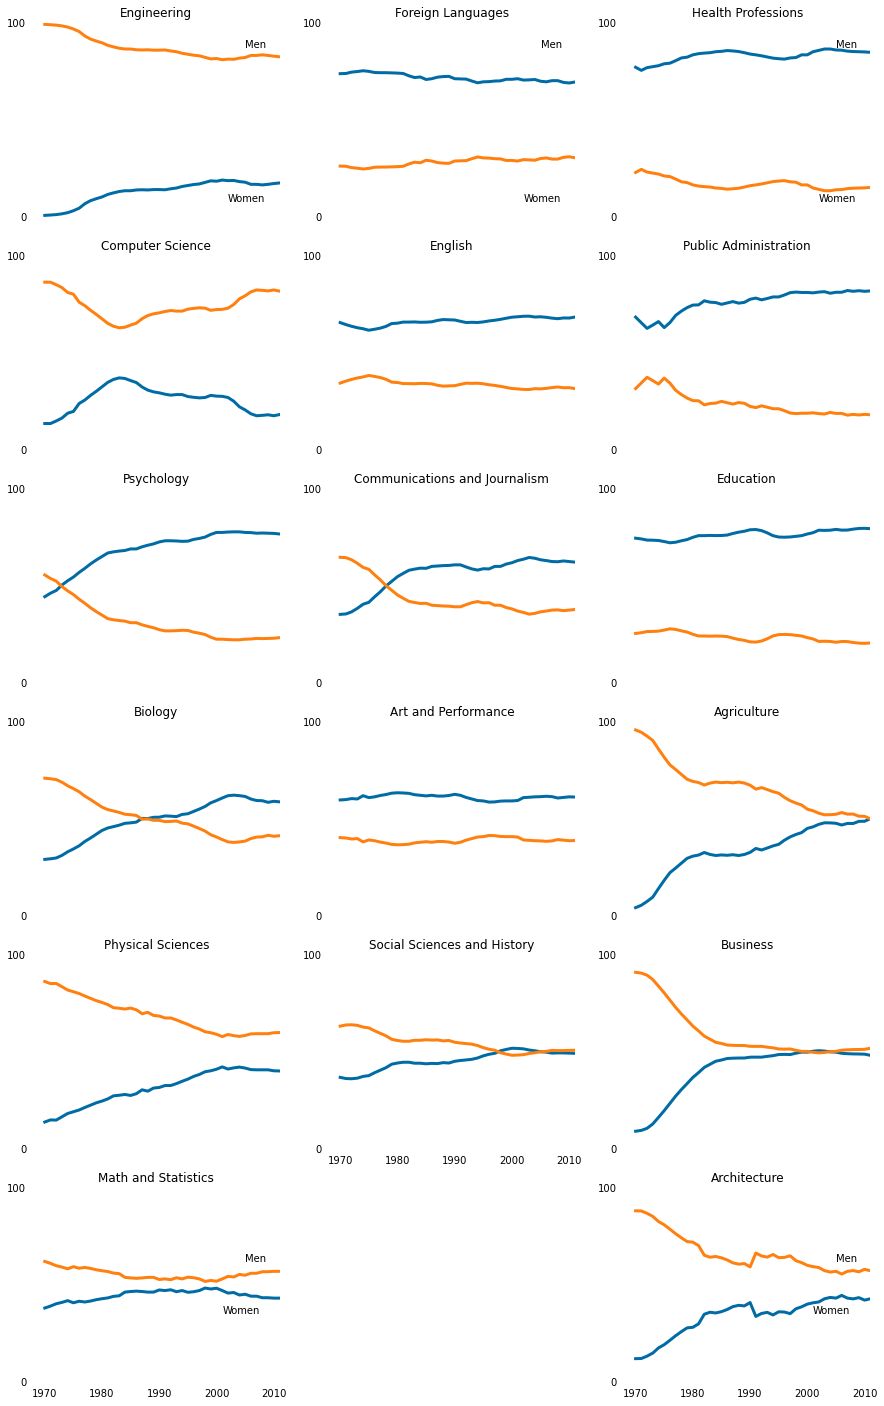

In [42]:
fig = plt.figure(figsize=(15, 25))

for cat in categories:
    for sp in range(0,len(cat)):
        ax = fig.add_subplot(6,3,categories.index(cat)+sp*3+1)
        ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(cat[sp])
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
        
        if sp == len(cat)-1:
            ax.tick_params(labelbottom=True)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == len(cat)-1 and categories.index(cat) != 1:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')

plt.show()

Hmmmm, not the best since we no longer can easily decipher the 50% mark. Let's add a line to show where the 505/50 mix is located on each chart.

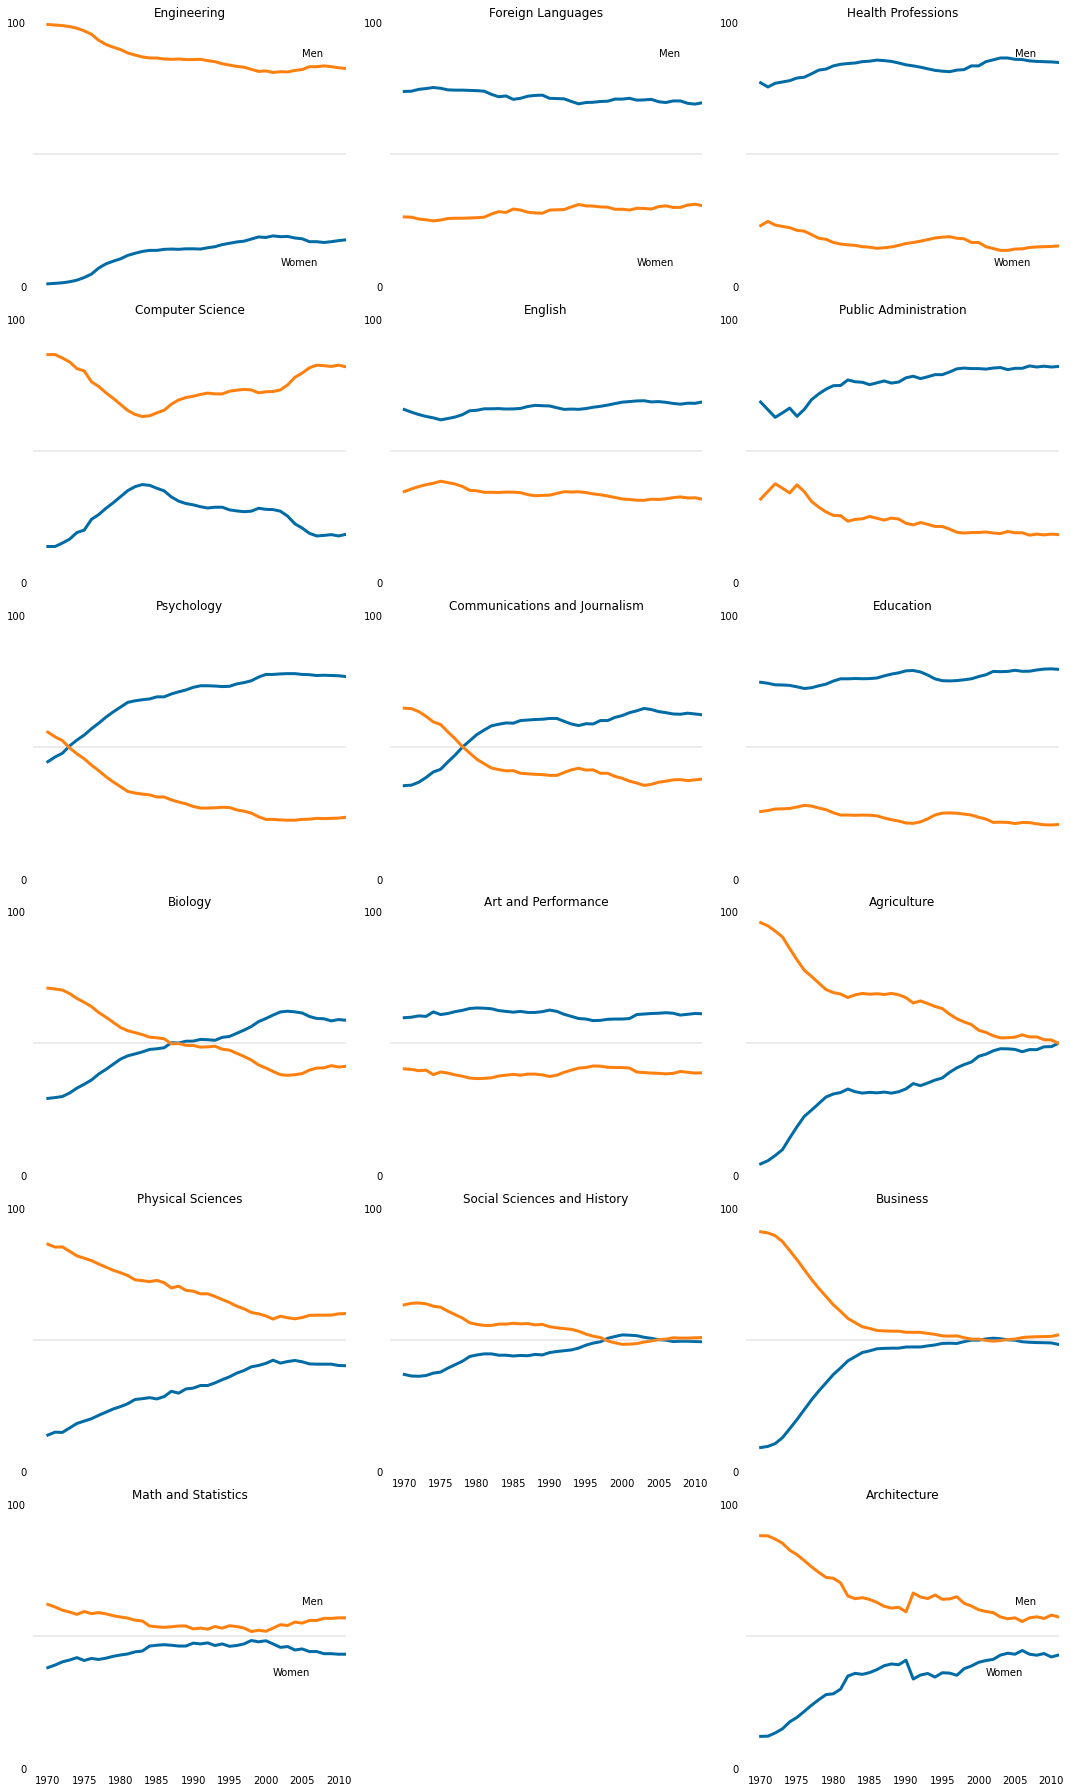

In [55]:
fig = plt.figure(figsize=(15, 25))

for cat in categories:
    for sp in range(0,len(cat)):
        ax = fig.add_subplot(6,3,categories.index(cat)+sp*3+1)
        ax.plot(women_degrees['Year'], women_degrees[cat[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[cat[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.set_title(cat[sp])
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        
        if sp == len(cat)-1:
            ax.tick_params(labelbottom=True)

        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == len(cat)-1 and categories.index(cat) != 1:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')

plt.tight_layout()
plt.savefig("gender_degrees.pdf")          
plt.show()